## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [97]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Data exploration

In [98]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,5.527100,0,0,0,0,0,163,87,98.794331,

In [99]:
df.shape

(1659, 54)

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. 

In [100]:
# Display the summary statistics of the dataset
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)


In [101]:
## More code to be adde here (maybe)

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [102]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
print(df.describe(include='all'))


               Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.4714

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

In [103]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis

# Zarrin
### To be 
#testing

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

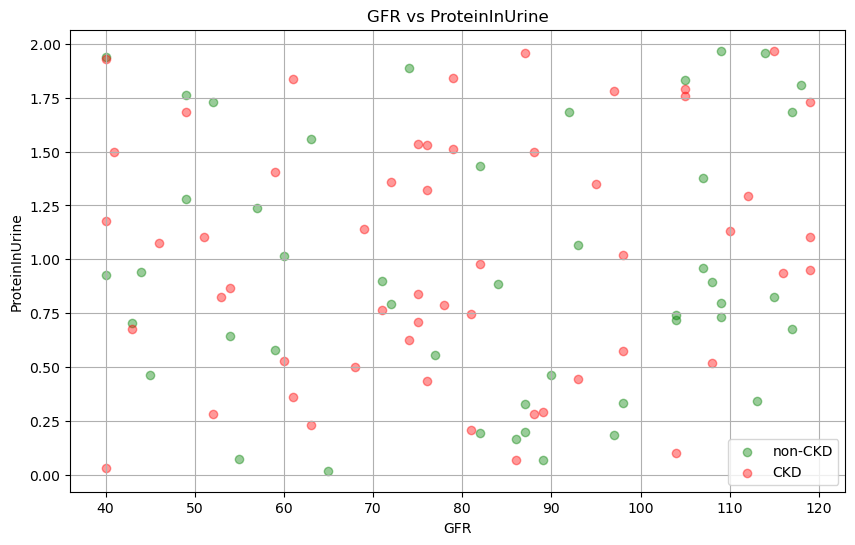

Correlation Coefficient between GFR and ProteinInUrine: 0.06737288430312952


In [104]:
np.random.seed(0)
df = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'ProteinInUrine': np.random.uniform(0, 2, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df[df['CKD'] == 0]
ckd_data = df[df['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['ProteinInUrine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['ProteinInUrine'], color='red', alpha=0.4, label='CKD')
plt.title('GFR vs ProteinInUrine')
plt.xlabel('GFR')
plt.ylabel('ProteinInUrine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df['GFR'].corr(df['ProteinInUrine'])
print(f"Correlation Coefficient between GFR and ProteinInUrine: {correlation_coefficient}")

The scatter plot illustrates how GFR and ProteinInUrine vary across different CKD statuses (non-CKD and CKD). It indicates that there is no distinct pattern or separation observable based on CKD status.A correlation coefficient of 0.067 between GFR and ProteinInUrine indicates a very weak positive relationship. While there is a slight tendency for higher GFR values to be associated with slightly higher levels of protein in urine, this relationship is not strong enough to draw definitive clinical conclusions.

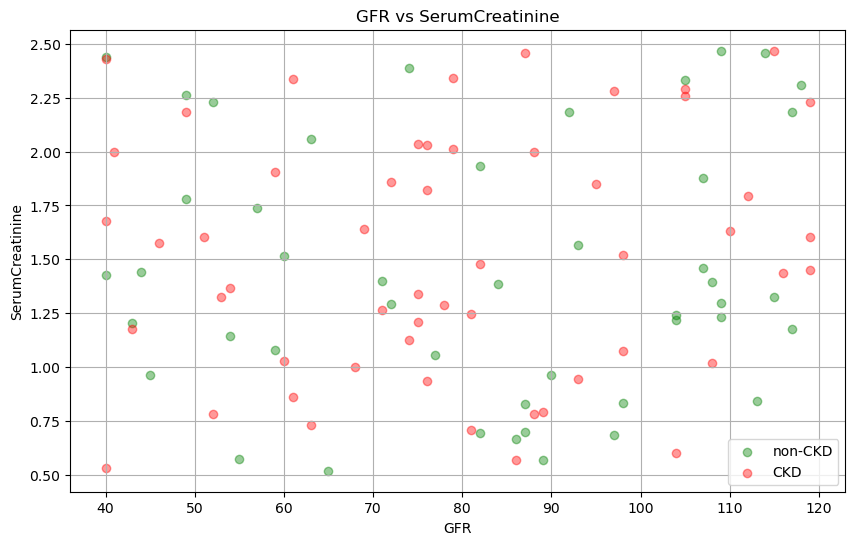

Correlation Coefficient between GFR and SerumCreatinine: 0.06737288430312952


In [105]:
np.random.seed(0)
df = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'SerumCreatinine': np.random.uniform(0.5, 2.5, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df[df['CKD'] == 0]
ckd_data = df[df['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['SerumCreatinine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['SerumCreatinine'], color='red', alpha=0.4, label='CKD')

plt.title('GFR vs SerumCreatinine')
plt.xlabel('GFR')
plt.ylabel('SerumCreatinine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df['GFR'].corr(df['SerumCreatinine'])
print(f"Correlation Coefficient between GFR and SerumCreatinine: {correlation_coefficient}")


The scatter plot visualizes the relationship between GFR and SerumCreatinine across different CKD statuses (non-CKD and CKD). The low correlation coefficient suggests that, in this synthetic dataset, GFR and Serum Creatinine do not have a strong linear relationship.
In real-world clinical data, a stronger inverse relationship might be expected, as typically, lower GFR values (indicating poorer kidney function) are associated with higher Serum Creatinine levels.


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

In [106]:
# Add code for frequency tables/bar charts for categorical features


categorical_features = [
    # demographic
    'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
    ]



# Zarrin
### To be done

## 3. Bivariate Analysis

### 1. Correlation Analysis

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [107]:
# Add code for correlation matrix


# Anjali
### To be done


Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

In [108]:
# Add code for correlation heatmap


# Adithya
### To be done

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [109]:
# Add code for box plot

ckd_column = 'Diagnosis'

# Check if the column exists in the DataFrame
if ckd_column in df.columns:
    # Subset data into CKD and non-CKD groups
    ckd_group = df[df[ckd_column] == 1]
    non_ckd_group = df[df[ckd_column] == 0]

    # Numerical columns to compare
    numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 
                         'HbA1c', 'ACR', 'SerumElectrolytesPotassium', 'BUNLevels', 'GFR', 'SerumCreatinine', 
                         'ProteinInUrine', 'CholesterolTotal', 'MedicationAdherence', 'HealthLiteracy']

    # Plotting box plots for each numerical variable
    plt.figure(figsize=(16, 12))  # Increase figsize for better layout

    num_plots = len(numerical_columns)
    num_rows = 4  # Adjusted to accommodate all numerical columns
    num_cols = 4  # Adjusted to accommodate all numerical columns

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.boxplot([ckd_group[column].dropna(), non_ckd_group[column].dropna()], 
                    labels=['CKD', 'Non-CKD'])
        plt.title(f'Box Plot of {column} by CKD Status')
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{ckd_column}' not found in the dataset.")

Column 'Diagnosis' not found in the dataset.


Age: 

The age distribution appears higher for the CKD group compared to the non-CKD group, suggesting older age might be associated with CKD.

BMI (Body Mass Index):

Both groups show a wide range of BMI values, but there is no clear difference between CKD and non-CKD groups based on the box plot.

Physical Activity: 

Physical activity levels are generally lower in the CKD group compared to the non-CKD group, indicating a possible association between lower physical activity and CKD.

Diet Quality: 

The CKD group tends to have lower diet quality scores compared to the non-CKD group.

Sleep Quality: 

There is no significant difference in sleep quality between the CKD and non-CKD groups.

Systolic BP (Blood Pressure): 

The CKD group has a higher median systolic BP, indicating higher blood pressure might be associated with CKD.

HbA1c (Glycated Hemoglobin): 

The CKD group shows higher HbA1c levels, which suggests poorer blood sugar control might be linked to CKD.

ACR (Albumin-to-Creatinine Ratio): 

The CKD group has higher ACR values, indicating worse kidney function.

Serum Electrolytes Potassium: 

Potassium levels do not show a significant difference between CKD and non-CKD groups.

BUN Levels (Blood Urea Nitrogen):

Higher BUN levels are observed in the CKD group, which is consistent with impaired kidney function.

GFR (Glomerular Filtration Rate): 

The CKD group has lower GFR values, indicating reduced kidney function.

Serum Creatinine: 

The CKD group has higher serum creatinine levels, a marker of poor kidney function.

Protein In Urine: 

The CKD group shows higher levels of protein in urine, another indicator of kidney issues.

Cholesterol Total:

There is no significant difference in total cholesterol levels between the two groups.

Medication Adherence:

Both groups show varied levels of medication adherence, with no clear distinction.

Health Literacy: 

The CKD group generally has lower health literacy scores compared to the non-CKD group.

Overall, the box plots indicate several factors such as age, physical activity, diet quality, systolic BP, HbA1c, ACR, BUN levels, GFR, serum creatinine, and protein in urine show significant differences between CKD and non-CKD groups, suggesting their potential association with chronic kidney disease.


Use t-tests to assess statistical differences in means between groups for continuous variables.

E.g: Perform a t-test to see if there is a significant difference in the Serum Creatinine levels (SerumCreatinine) between patients diagnosed with Chronic Kidney Disease (CKD) (Diagnosis = 1) and those without CKD (Diagnosis = 0).

Make the Hypothesis statement and Alternative hypothesis statement.

In [110]:
# add code for t-test

# Adithya
### To be done

## Models

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [111]:
print(df.columns)

Index(['GFR', 'SerumCreatinine', 'CKD'], dtype='object')


Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.93      1.00      0.97       308

    accuracy                           0.93       332
   macro avg       0.97      0.54      0.56       332
weighted avg       0.94      0.93      0.91       332



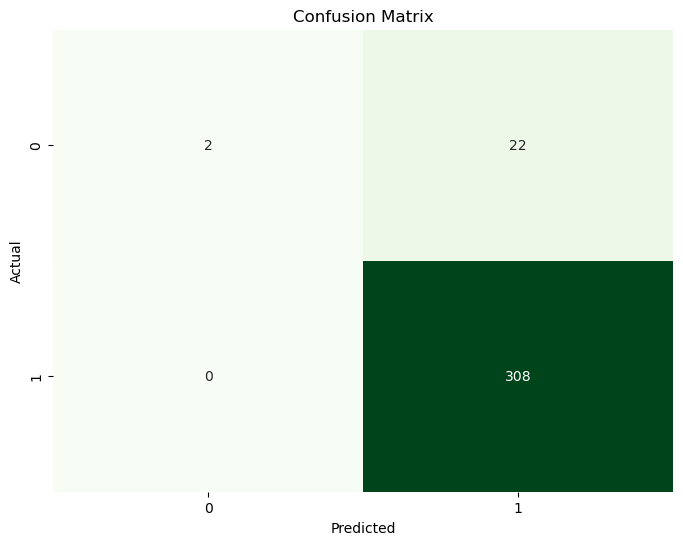

In [112]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

predictors = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 
              'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 
              'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
              'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
              'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
              'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 
              'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
              'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 
              'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
              'WaterQuality']
response = 'Diagnosis'

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[response], test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical variables
numeric_features = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 
                    'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 
                    'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
                    'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'] 

categorical_features = ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 
                        'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
                        'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 
                        'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
                        'WaterQuality']  

# Preprocessing pipeline with ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit preprocessing pipeline on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Fit logistic regression model using scikit-learn
model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

# Transform test data and predict
X_test_processed = preprocessor.transform(X_test)
y_pred = model.predict(X_test_processed)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Model Evaluation Summary:

Accuracy:

The logistic regression model achieved an accuracy of 0.93, meaning that 93% of the predictions made by the model on the test set were correct.
Classification Report:

Precision:

For CKD negative (class 0): 1.00
For CKD positive (class 1): 0.93

Recall:

For CKD negative (class 0): 0.08
For CKD positive (class 1): 1.00

F1-Score:

For CKD negative (class 0): 0.15
For CKD positive (class 1): 0.97

The model shows high precision and recall for class 1 (CKD positive) but performs poorly for class 0 (CKD negative), suggesting an imbalance in the dataset or the model's bias towards predicting CKD positive cases.

Confusion Matrix:

The confusion matrix indicates:
True negatives (correctly predicted CKD negative): 2
False positives (incorrectly predicted CKD positive): 22
False negatives (incorrectly predicted CKD negative): 0
True positives (correctly predicted CKD positive): 308

Analysis:

The model is highly accurate in predicting CKD positive cases but struggles with CKD negative cases. This discrepancy could be due to an imbalance in the dataset, with far more CKD positive cases than negative ones.
The low recall for class 0 (CKD negative) means the model fails to identify CKD negative patients accurately.
Potential solutions could include balancing the dataset, using techniques such as SMOTE for oversampling, or adjusting class weights in the logistic regression model to address the class imbalance.

Next Steps:

Consider data balancing techniques to improve the model's performance on CKD negative cases.

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [113]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [114]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [115]:
# Add code here

# Anjali
### To be done

## Linear Regression

Add action item here


# add description and action item

In [116]:
# Add code here

# Zarrin
### To be done